In [ ]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train= ImageDataGenerator(rescale=1/255)

In [ ]:
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory(r"/content/drive/My Drive/Major_Project/Image_dataset/train/",target_size=(200,200),batch_size =3, class_mode='binary')

Found 2154 images belonging to 2 classes.


In [ ]:
validation_dataset = train.flow_from_directory(r"/content/drive/My Drive/Major_Project/Image_dataset/valid",target_size=(200,200),batch_size =3, class_mode='binary')

Found 31 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'healthy': 0, 'wssv': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation ='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation ='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation ='sigmoid')
                                   ])

In [ ]:
model.compile(loss= 'binary_crossentropy', optimizer = RMSprop(learning_rate=0.001),
              metrics =['accuracy'])

In [ ]:
modelfit = model.fit(train_dataset,
                    steps_per_epoch=64,
                    epochs=35,
                    validation_data = validation_dataset)

Epoch 1/35
64/64 [==============================] - 73s 1s/step - loss: 0.2988 - accuracy: 0.9531 - val_loss: 0.4843 - val_accuracy: 0.8387
Epoch 2/35
64/64 [==============================] - 60s 935ms/step - loss: 0.0777 - accuracy: 0.9896 - val_loss: 1.5417 - val_accuracy: 0.8387
Epoch 3/35
64/64 [==============================] - 57s 881ms/step - loss: 0.1861 - accuracy: 0.9792 - val_loss: 0.6052 - val_accuracy: 0.8387
Epoch 4/35
64/64 [==============================] - 53s 819ms/step - loss: 0.0714 - accuracy: 0.9948 - val_loss: 1.7565 - val_accuracy: 0.8387
Epoch 5/35
64/64 [==============================] - 60s 926ms/step - loss: 0.1442 - accuracy: 0.9844 - val_loss: 0.8410 - val_accuracy: 0.8387
Epoch 6/35
64/64 [==============================] - 54s 821ms/step - loss: 0.1291 - accuracy: 0.9844 - val_loss: 1.6538 - val_accuracy: 0.8387
Epoch 7/35
64/64 [==============================] - 52s 803ms/step - loss: 0.1125 - accuracy: 0.9844 - val_loss: 1.1980 - val_accuracy: 0.8387
Ep

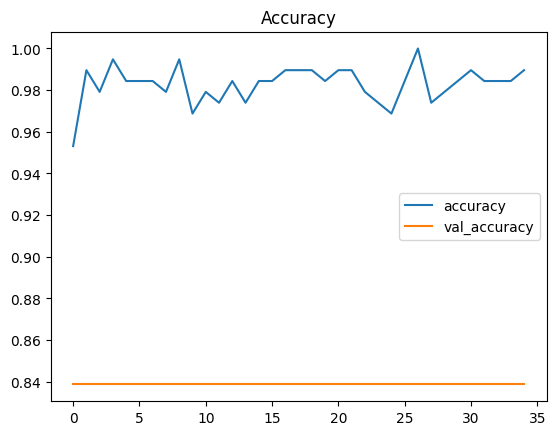

In [ ]:
pd.DataFrame(modelfit.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

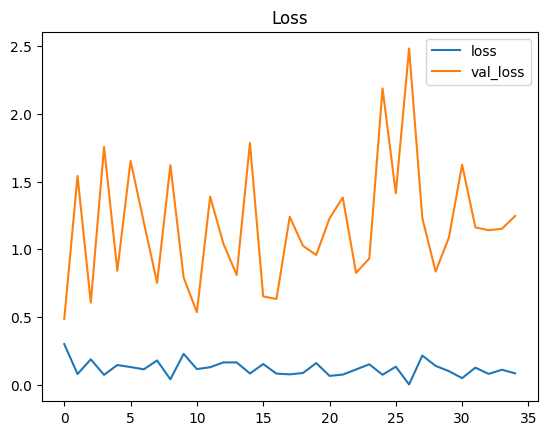

In [ ]:
pd.DataFrame(modelfit.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

In [ ]:

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D, Flatten,Dense, Dropout
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D,GlobalMaxPool2D
base_model1 = EfficientNetB0	(
                    input_shape=(224, 224, 3),
                    weights='imagenet',
                    include_top=False)

for layer in base_model1.layers[:15]:
    layer.trainable = False
x = base_model1.output
x = GlobalMaxPool2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
predictions1 = Dense(1, activation='sigmoid')(x)
model1 = Model(inputs=base_model1.inputs, outputs=predictions1)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model1.compile(loss= 'binary_crossentropy', optimizer = RMSprop(learning_rate=0.001),
              metrics =['accuracy'])

In [ ]:
modelfit = model1.fit(train_dataset,
                    steps_per_epoch=64,
                    epochs=35,
                    validation_data = validation_dataset)

Epoch 1/35
64/64 [==============================] - 71s 780ms/step - loss: 1.1107 - accuracy: 0.9531 - val_loss: 1.5129 - val_accuracy: 0.8387
Epoch 2/35
64/64 [==============================] - 51s 785ms/step - loss: 0.3011 - accuracy: 0.9583 - val_loss: 0.6238 - val_accuracy: 0.7419
Epoch 3/35
64/64 [==============================] - 46s 721ms/step - loss: 0.1843 - accuracy: 0.9583 - val_loss: 0.4705 - val_accuracy: 0.8387
Epoch 4/35
64/64 [==============================] - 46s 718ms/step - loss: 0.2050 - accuracy: 0.9740 - val_loss: 0.4646 - val_accuracy: 0.8387
Epoch 5/35
64/64 [==============================] - 46s 717ms/step - loss: 1.6444 - accuracy: 0.9531 - val_loss: 1.1014 - val_accuracy: 0.8387
Epoch 6/35
64/64 [==============================] - 49s 765ms/step - loss: 0.0429 - accuracy: 0.9948 - val_loss: 3.1638 - val_accuracy: 0.8387
Epoch 7/35
64/64 [==============================] - 47s 728ms/step - loss: 0.0793 - accuracy: 0.9896 - val_loss: 0.9624 - val_accuracy: 0.8387

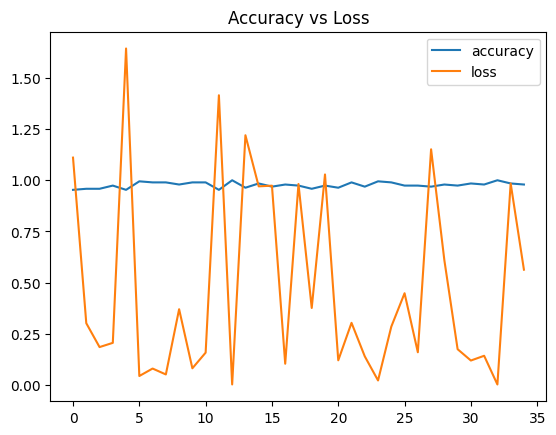

In [ ]:
pd.DataFrame(modelfit.history)[['accuracy','loss']].plot()
plt.title("Accuracy vs Loss")
plt.show()

In [1]:
#as val_acccuracy and val_loss was very varying
#pd.DataFrame(modelfit.history)[['loss','val_loss']].plot()
#plt.title("Loss")
#plt.show()
